In [5]:
# This notebook contains code to visualize gamma distribution of s values from a,b pairs drawn from prior distribution

In [6]:
%pylab inline
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [7]:
def main():
    mu, sigma = np.log(0.0003), np.log(30) # 0.005, 40
    s = []
    shape_scale_combos = []
    
    for i in range (0, 20):
        k = np.random.uniform()
        mean = np.random.lognormal(mu, sigma)
        theta = mean/k
        shape_scale_combos.append((k, theta))

    fig_num = 0
    for combo in shape_scale_combos:

        shape = combo[0]
        scale = combo[1] 
        print('Shape %.4f scale %.4f'%(shape, scale))
        print('Mean')
        print(shape*scale)

        beta = 1/scale
        num_sims = 10000

        s = [] # List of s values drawn from gamma distribution
        for i in range(0, num_sims):
            s_val = np.random.gamma(shape, scale)
            if s_val > 1:
                s_val = 1
            s.append(s_val)

        # List of binned s values
        # Bins: 0<=s<10^-4, 10^-4<=s<10^-3, 10^-3<=s<10^-2, s>=10^-2
        svals = [0, 0, 0, 0] 
        for elem in s:
            if elem < 10**-4:
                svals[0] += 1
            elif elem < 10**-3:
                svals[1] += 1
            elif elem < 10**-2:
                svals[2] += 1
            elif elem >= 10**-2:
                svals[3] += 1

        print('Median s value of gama distribution')
        print(np.median(s))

        # Plot pdf of gamma distribution
        fig_num = fig_num + 1
        plt.figure(fig_num)
        plt.hist(s, bins = 100, weights=np.ones(len(s)) / len(s)) 
        plt.xlabel("s")
        plt.ylabel("Density")
        plt.title("Posterior distribution on s")
        #plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')
        plt.xticks(rotation=15) 

        # Plot discrete pdf of gamma distribution
        fig_num = fig_num + 1
        plt.figure(fig_num)
        x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
        y_pos = np.arange(len(x))
        barWidth = 0.2
        r1 = np.arange(len(x))

        # Normalize s values
        total = sum(svals)
        for i in range(0, len(svals)):
            svals[i] = svals[i]/total

        plt.bar(r1, svals, color='red', width=barWidth) 
        plt.xticks([r + barWidth/2 for r in range(len(x))], x)
        plt.xticks(rotation=15) 
        plt.xlabel("S value")
        plt.ylabel("Probability")
        plt.title("Gamma Distribution k=%.5f; theta=%.5f"%(shape, scale)) 
        plt.show()
        #plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_discrete_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')

Shape 0.0016 scale 0.3013
Mean
0.000482695976101492
Median s value of gama distribution
6.572769302690986e-191


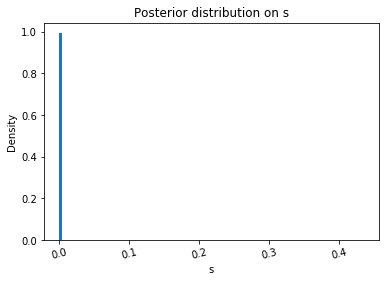

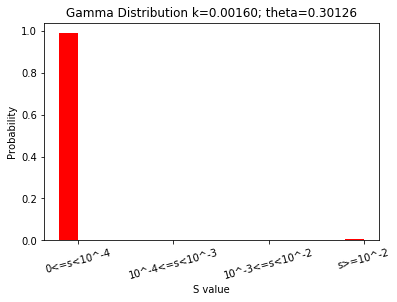

Shape 0.4048 scale 0.2334
Mean
0.09445705036177128
Median s value of gama distribution
0.03372254041584962


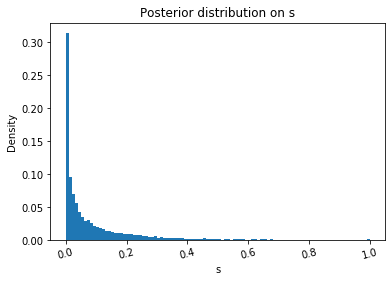

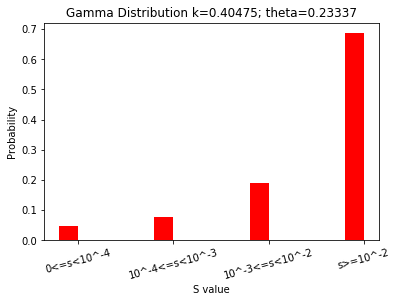

Shape 0.2762 scale 0.0000
Mean
9.664712070610574e-06
Median s value of gama distribution
2.03013675405548e-06


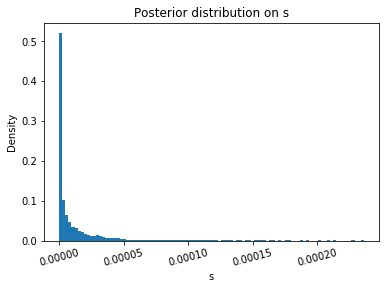

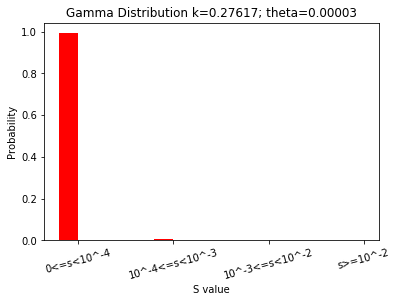

Shape 0.5951 scale 0.0000
Mean
3.810704760960083e-06
Median s value of gama distribution
2.0080888237039548e-06


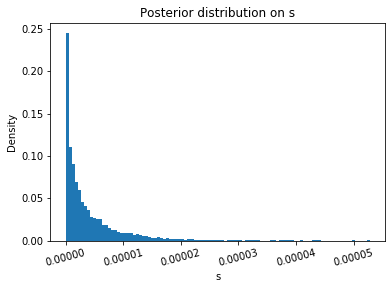

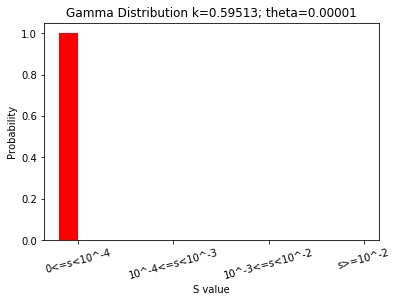

Shape 0.6904 scale 0.0009
Mean
0.0006423566712528753
Median s value of gama distribution
0.00036937281630538773


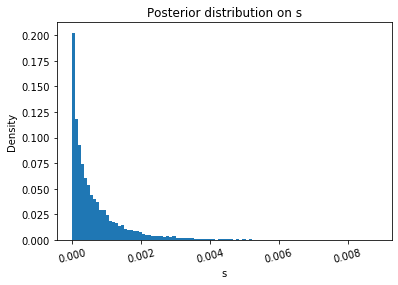

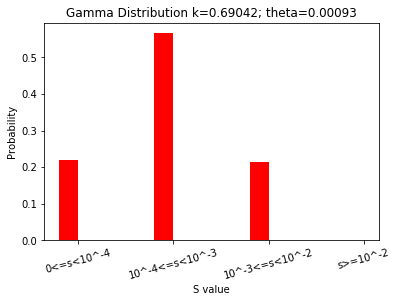

Shape 0.0837 scale 0.0006
Mean
4.965834567692877e-05
Median s value of gama distribution
8.227818380854039e-08


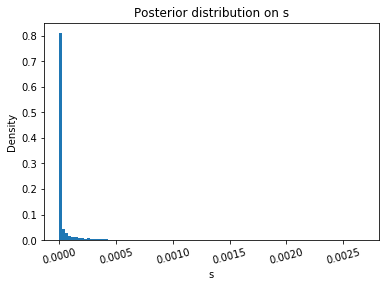

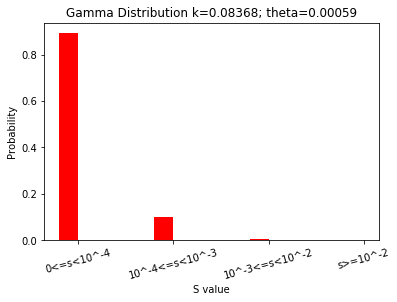

Shape 0.9100 scale 0.0006
Mean
0.0005427104590472511
Median s value of gama distribution
0.00035409523440702343


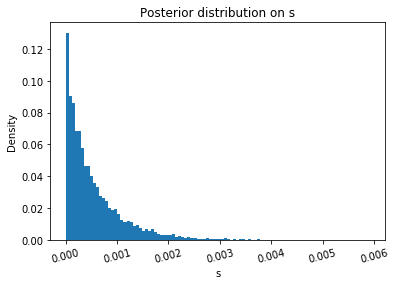

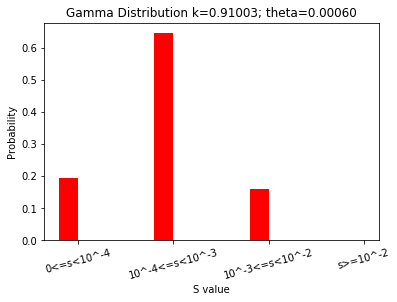

Shape 0.5086 scale 0.0001
Mean
4.848933181010306e-05
Median s value of gama distribution
2.205552709902431e-05


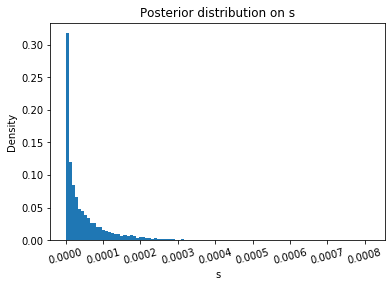

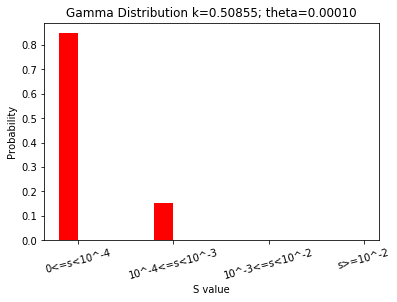

Shape 0.8327 scale 0.7594
Mean
0.6323503725018117
Median s value of gama distribution
0.4000718262971471


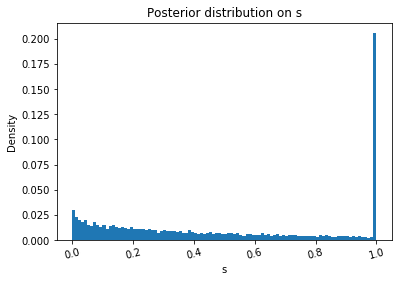

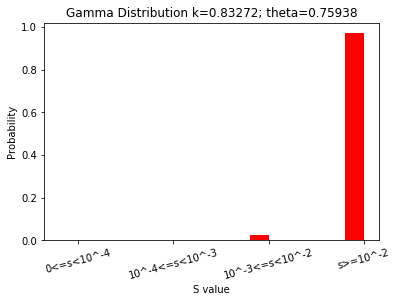

Shape 0.8805 scale 0.0000
Mean
2.5370280090062993e-06
Median s value of gama distribution
1.6457064791510045e-06


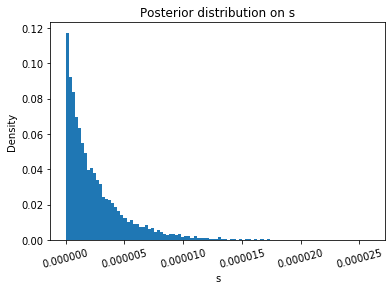

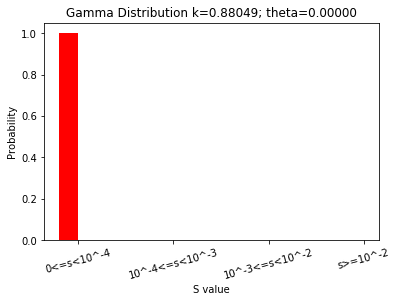

Shape 0.9376 scale 0.0009
Mean
0.0008179529420862897
Median s value of gama distribution
0.0005576043382773496


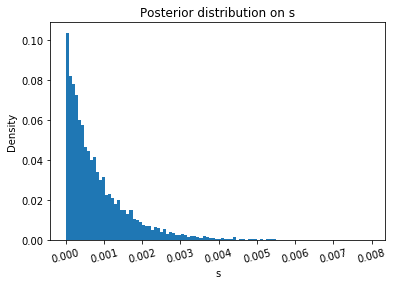

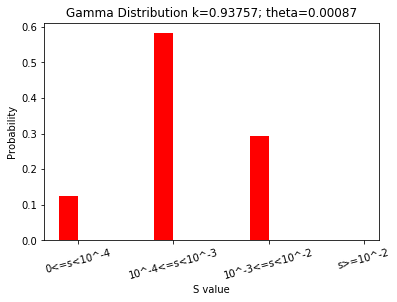

Shape 0.5751 scale 0.0007
Mean
0.00041718911122087723
Median s value of gama distribution
0.00021387763053683456


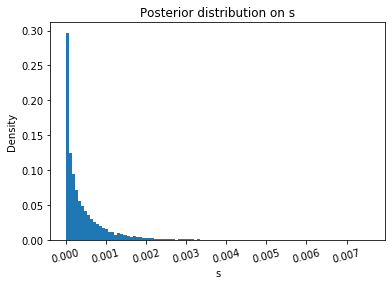

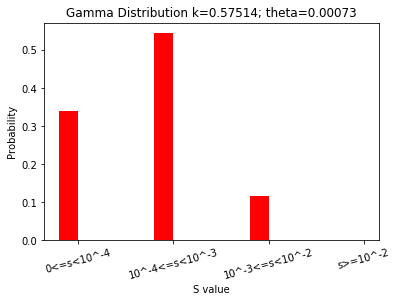

Shape 0.6040 scale 0.0033
Mean
0.0019667250194155186
Median s value of gama distribution
0.0010361183878260156


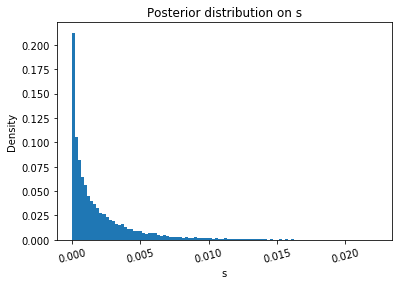

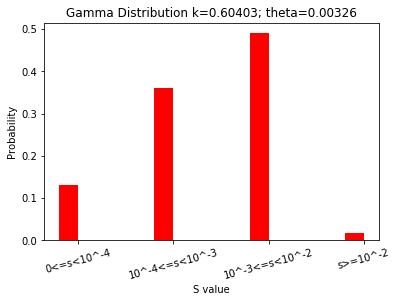

Shape 0.2853 scale 0.0013
Mean
0.0003729819682104885
Median s value of gama distribution
8.28919509592685e-05


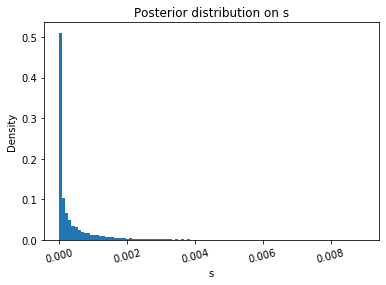

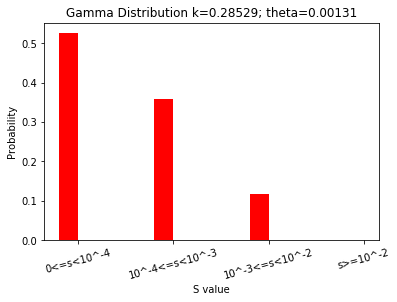

Shape 0.7685 scale 0.0002
Mean
0.00013750248217835336
Median s value of gama distribution
8.389434555824838e-05


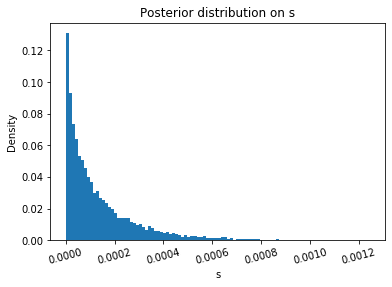

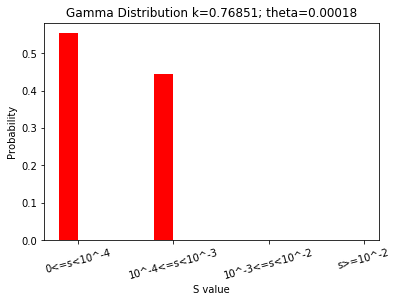

Shape 0.2490 scale 0.0005
Mean
0.00011983916210591456
Median s value of gama distribution
2.1514732631835242e-05


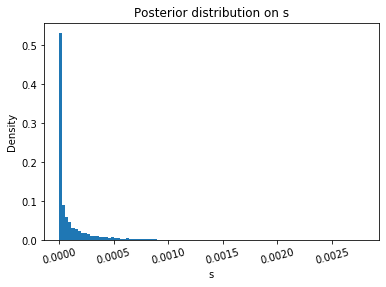

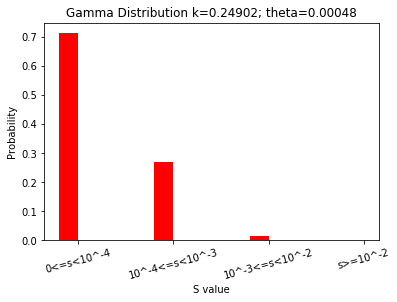

Shape 0.3214 scale 0.0000
Mean
3.8008044705758067e-06
Median s value of gama distribution
9.810873007054386e-07


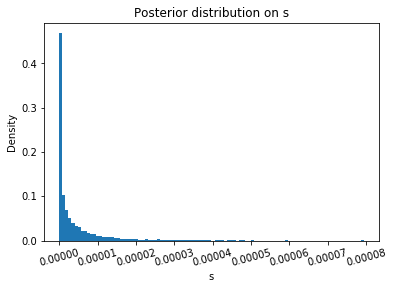

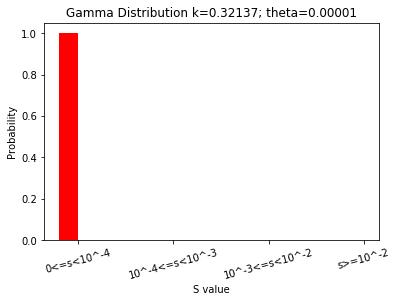

Shape 0.9045 scale 0.0044
Mean
0.0040128337045270196
Median s value of gama distribution
0.002676008337023021


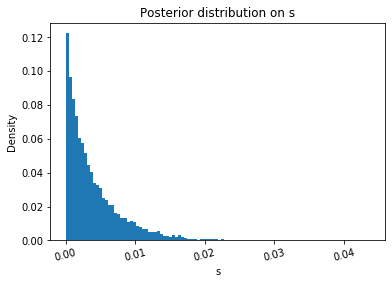

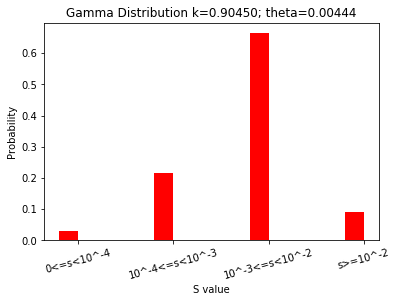

Shape 0.8377 scale 0.0000
Mean
2.906333657994042e-05
Median s value of gama distribution
1.909128214608778e-05


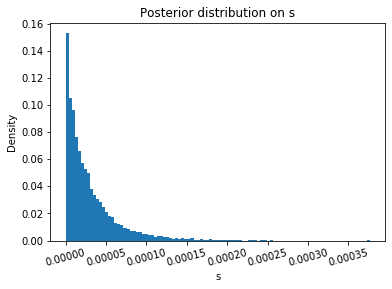

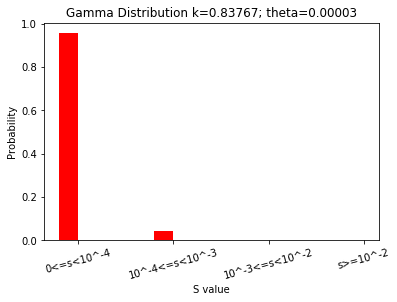

Shape 0.7326 scale 0.0008
Mean
0.000572005553891346
Median s value of gama distribution
0.00033367608737659384


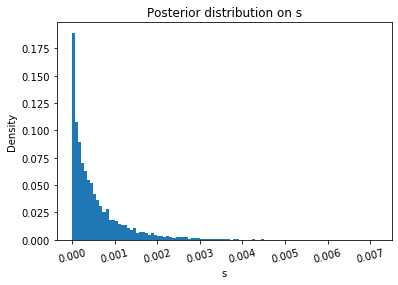

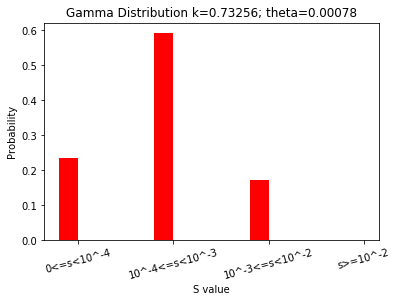

CPU times: user 12.4 s, sys: 150 ms, total: 12.5 s
Wall time: 12.5 s


In [8]:
%%time
if __name__ == '__main__':
    main()